In [ ]:
# download color file
#!wget 'https://github.com/codebrainz/color-names/blob/master/output/colors.csv'



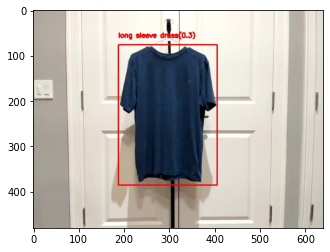

In [97]:
# experimentation with color detection

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import boto3
import io
import cv2
from PIL import Image, ImageDraw

bucket = 'descriptiveworld-demo-images'
key = 'current.jpg'
region = 'us-west-2'

# layout bounding box (for 1 item)
#left = item['left']
#top = item['top']
#width = item['width']
#height = item['height']
#right = left + width
#bottom = top + height

s3 = boto3.client("s3")

# fetching object from bucket
file_obj = s3.get_object(Bucket=bucket, Key=key )

# reading the file content in bytes
file_content = file_obj["Body"].read()

# creating 1D array from bytes data range between[0,255]
np_array = np.frombuffer(file_content, np.uint8)

# decoding array
img = cv2.imdecode(np_array, cv2.IMREAD_COLOR)

# convert back to RGB from BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img_rgb)

plt.show(imgplot)

In [98]:
# load our colors
index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

# globals
r = g = b = xpos = ypos = 0

# function to indentify color
def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

# mouse click handler
def detect_color(x, y):
    global b,g,r,xpos,ypos
    xpos = x
    ypos = y
    b,g,r = img[y,x]
    b = int(b)
    g = int(g)
    r = int(r)

In [99]:

 
detect_color(320, 240)
# print(b, g, r, xpos, ypos)

#Creating text string to display( Color name and RGB values )
text = recognize_color(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)

print(text)

        

Oxford Blue R=18 G=42 B=68


In [100]:
# Sagemaker output
obj_output = [{'class_id': 2, 'left': 21, 'top': 2, 'width': 532, 'height': 476}]

In [101]:
width = obj_output[0]['width']
height = obj_output[0]['height']
top = obj_output[0]['top']
left = obj_output[0]['left']

wid_4 = width // 4
h_4 = height // 4

In [102]:
colors = []

# Used for getting the most frequent color of 21 points
for N in range(0,15):
    rand_pos1 = np.random.randint(wid_4, width - wid_4)
    rand_pos2 = np.random.randint(h_4, height - h_4)
    
    detect_color(left + rand_pos1, top + rand_pos2)
    
    colors.append(recognize_color(r,g,b))

item_color = max(colors) 

print(item_color)

Prussian Blue
